# Coursera
### Wesleyan University Data Analysis and Interpretation Specialization

Course 4: Machine Learning for Data Analysis<br>
Week 1: Running a Classification Tree<br>
Author: Matt Clark


### Instructions:
<blockquote>
This week’s assignment involves decision trees, and more specifically, classification trees. Decision trees are predictive models that allow for a data driven exploration of nonlinear relationships and interactions among many explanatory variables in predicting a response or target variable. When the response variable is categorical (two levels), the model is a called a classification tree. Explanatory variables can be either quantitative, categorical or both. Decision trees create segmentations or subgroups in the data, by applying a series of simple rules or criteria over and over again which choose variable constellations that best predict the response (i.e. target) variable.

Run a Classification Tree.

You will need to perform a decision tree analysis to test nonlinear relationships among a series of explanatory variables and a binary, categorical response variable.

WHAT TO SUBMIT:

Following completion of the steps described above, create a blog entry where you submit syntax used to run a Classification Tree (copied and pasted from your program) along with corresponding output and a few sentences of interpretation. Please note that your reviewers should NOT be required to download any files in order to complete the review.

Review criteria

Your assessment will be based on the evidence you provide that you have completed all of the steps. In all cases, consider that the peer assessing your work is likely not an expert in the field you are analyzing.
</blockquote>

### Data Preparation:

#### Import libraries.

In [1]:
from pandas import Series, DataFrame
import os
# from sklearn.cross_validation import train_test_split - deprecated, use sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

import pandas as pd
import numpy as np
import seaborn as sb
import scipy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pathlib import Path

#### Dataframe generation.

In [2]:
root_dir = Path().resolve().parents[1]
df = pd.read_csv(str(root_dir)+'/ool_pds.csv', low_memory=False)

#### Coerce predictor variables into numeric format.

In [3]:
# 'W1_A1', 'W1_A5A', 'W1_C1', 'W1_C2'

df['PPEDUCAT'] = df['PPEDUCAT'].apply(pd.to_numeric, errors='coerce' )
df['W1_A1'] = df['W1_A1'].apply(pd.to_numeric, errors='coerce' )
df['W1_A5A'] = df['W1_A5A'].apply(pd.to_numeric, errors='coerce' )
df['W1_C1'] = df['W1_C1'].apply(pd.to_numeric, errors='coerce' )
df['W1_M2'] = df['W1_M2'].apply(pd.to_numeric, errors='coerce' )

#### Remove invalid entries (-1, np.nan) from data.

In [4]:
# Map -1 (refused to respond) to np.nan
# dropna

df1 = df.replace(-1,np.nan).dropna()

#### Dichotomize response variable W1_F6.

In [5]:
# Dichotomize response variable W1_F6
# We expclude the -1 refusals to respond, and categorize 0-5: less optimistic, 6-10: more optimistic

di_w1_f6 = {-1: np.nan, 0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}
df2 = df1.replace({"W1_F6": di_w1_f6}).dropna() # use the dictionary to drop NA values and replace numeric values with binary.


#### Save clean data to CSV.

In [6]:
# df2.to_csv(str(root_dir)+'/tree_ool_pds.csv')

### Create Classification Tree.

#### Train, Test, Split.

In [7]:
predictors = df2[['PPEDUCAT', 'W1_A1', 'W1_A5A', 'W1_C1', 'W1_C2']]

targets = df2.W1_F6

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

(308,)

#### Build model on training data.

In [8]:
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)
sklearn.metrics.accuracy_score(tar_test, predictions)

0.6331168831168831

### Display Decision Tree. 

#### Note: Because github's jupyter notebook renderer may not support graphviz, I am including the code for generating the decision tree here, but including a pre-rendered image of the tree. I may look into rendering graphviz trees with github for a later project.

```python
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())
```

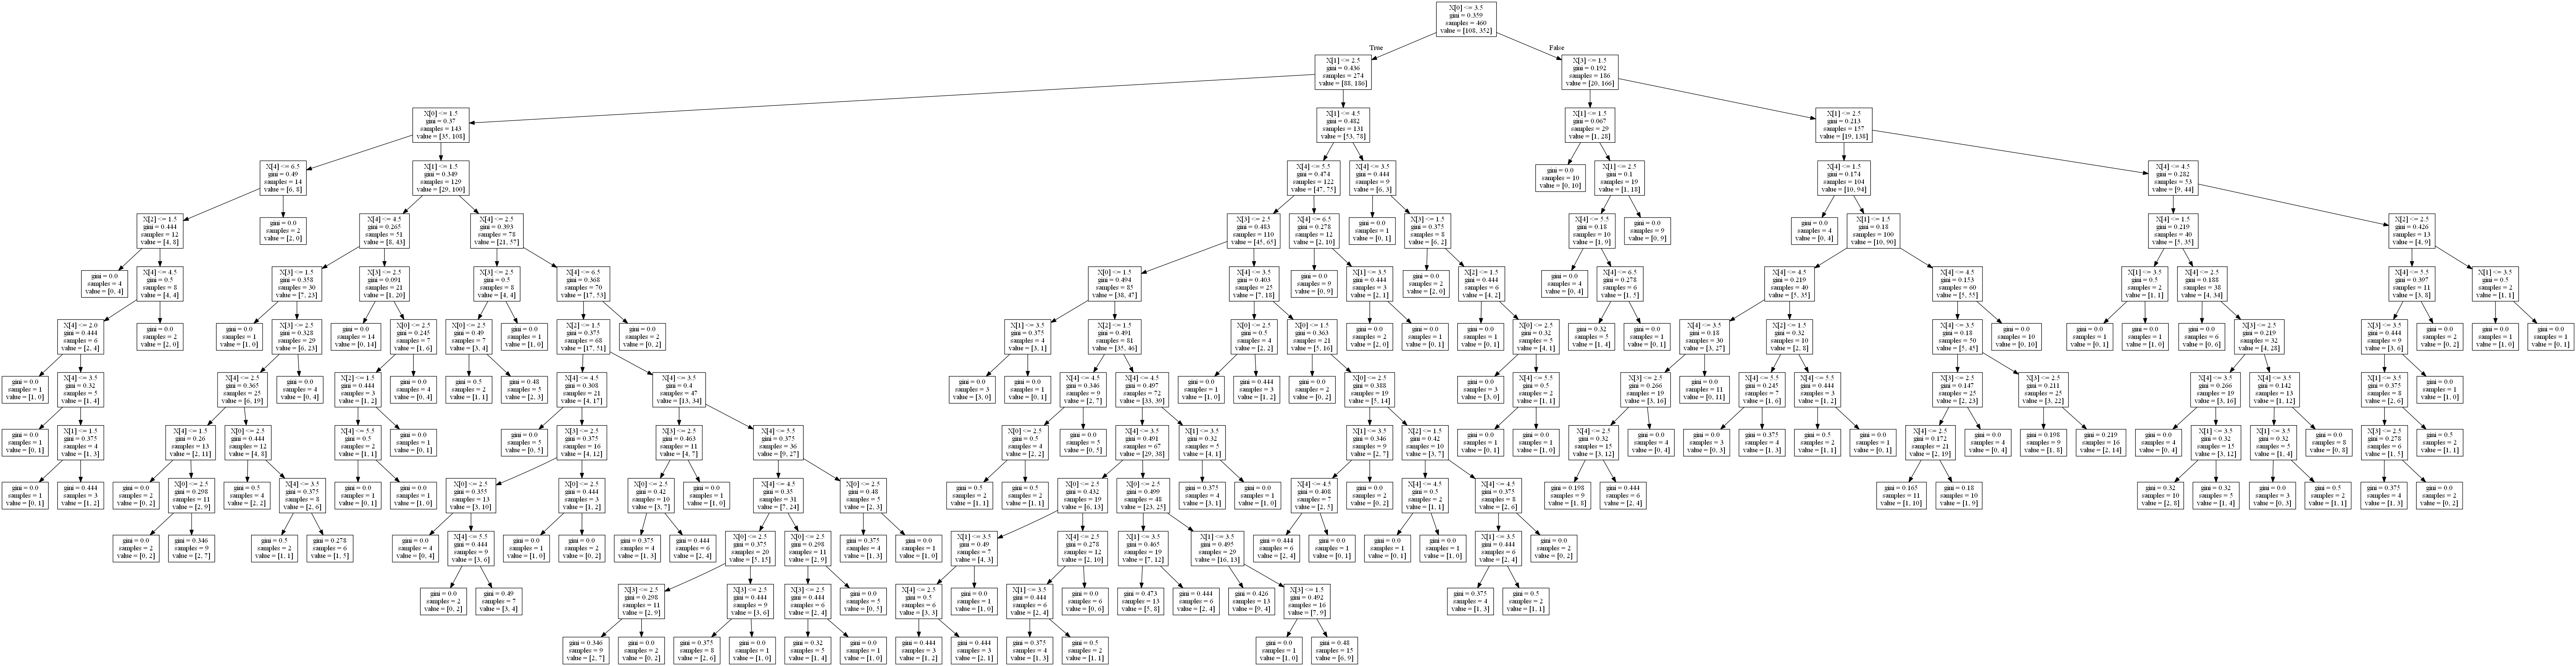

In [9]:
from IPython.core.display import Image, display
display(Image('https://raw.githubusercontent.com/mattclark801/coursera2020/master/img/ooldtree.png', width=3000, unconfined=True))

#### Generate Summary Statistics.

In [10]:
type(classifier)

sklearn.tree._classes.DecisionTreeClassifier

In [11]:
classifier.get_depth()

15

In [12]:
classifier.get_n_leaves()

129

In [13]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

### Summary:

Our model generated a decision tree of 115 leaves and depth 15, as shown above.

A few notes on this assignment. If you are grading this then you've probably dispatched with them already, but they may be of use to some:

1. The library sklearn.cross_validation is deprecated, but it can be changed in place for sklearn.model_selection to run test_train_split

2. If using conda to install the graphviz package, after installing, the graphviz /bin folder must be added to your system PATH environment variable.

3. If not using the tree_nesarc_pds.csv provided for this week's assignment, your data must be prepared before running the decisiontreeclassifier, so as to include no invalid data types such as -1 or np.nan.
